In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv', sep=';', index_col=0)

Source : https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [3]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Features:

    - Age | Objective Feature | age | int (days)
    - Height | Objective Feature | height | int (cm) |
    - Weight | Objective Feature | weight | float (kg) |
    - Gender | Objective Feature | gender | categorical code | (1 - women, 2 - men)
    - Systolic blood pressure | Examination Feature | ap_hi | int |
    - Diastolic blood pressure | Examination Feature | ap_lo | int |
    - Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    - Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    - Smoking | Subjective Feature | smoke | binary |
    - Alcohol intake | Subjective Feature | alco | binary |
    - Physical activity | Subjective Feature | active | binary |
    - Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données 
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : cardio
- **lignes et colonnes** : 7000, 12
- **types de variables** : 11 int 1 float
- **Analyse des valeurs manquantes** : No missing values

#### Analyse de Fond :
- **Visualisation de la target** : 50/50 

    
    
    
- **Signification des variables** :
    - variables continues non standardisées, skewed (asymétriques)
    - age en jours, à transformer en années pour meilleur visualisation
    - variables qualitatives binaires exceptées 'cholesterol' et 'gluc'

- **Relation Variables / Target** :
    - age, weight, cholesterol, gluc et active semblent avoir une influence sur la variable target: hypothèse à vérifier.
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - weight et height semblent légèrement corrélés: à vérifier plus tard


- **NaN analyse** : 0 NaN

### hypotheses nulle (H0): 

- H0 : La variable est indépendante de la target 'cardio' (non rejetée pour 'alco')
- un t-test nous a permis de voir que cette hypothèse est rejetée pour les variables 'age', 'height', 'weight', 'ap_hi', 'ap_lo'
- un test du chi2 nous a permis de voir que cette hypothèse est rejetée pour les variables 'gender', 'cholesterol', 'gluc', 'smoke', 'active'



## Analyse de Forme :

In [4]:
df = data.copy()

In [5]:
df.shape

(70000, 12)

In [6]:
df.dtypes.value_counts()

int64      11
float64     1
dtype: int64

<Axes: ylabel='id'>

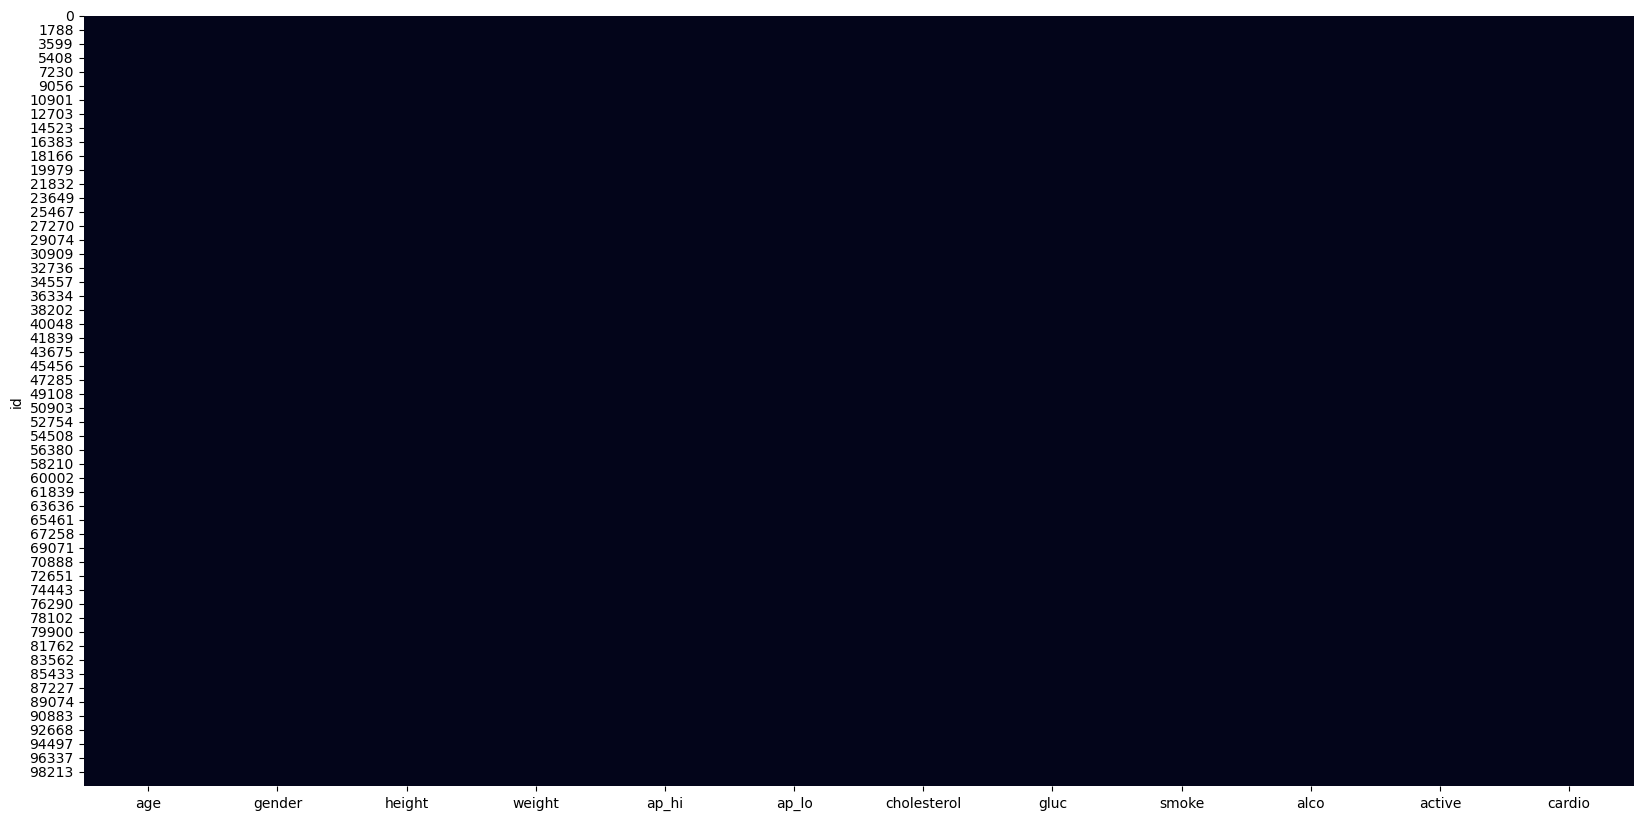

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

## Analyse de Fond :

### Visualisation de la target :

In [9]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [10]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Histogrames des variables continues

C:\Users\khipa\AppData\Local\Temp\ipykernel_9096\1276076344.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\khipa\AppData\Local\Temp\ipykernel_9096\1276076344.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\khipa\AppData\Local\Temp\ipykernel_9096\12760

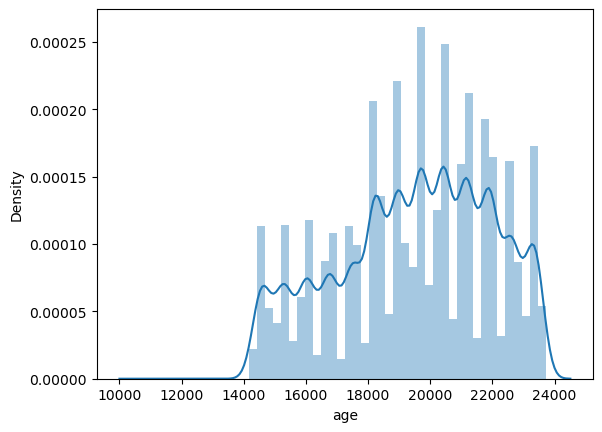

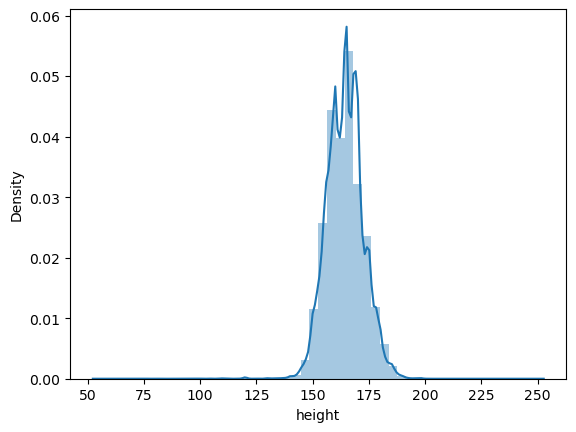

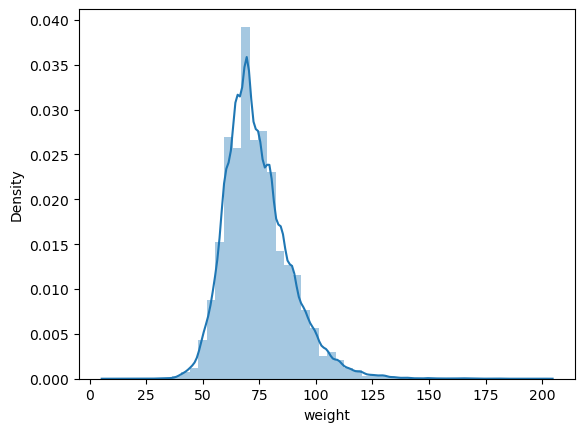

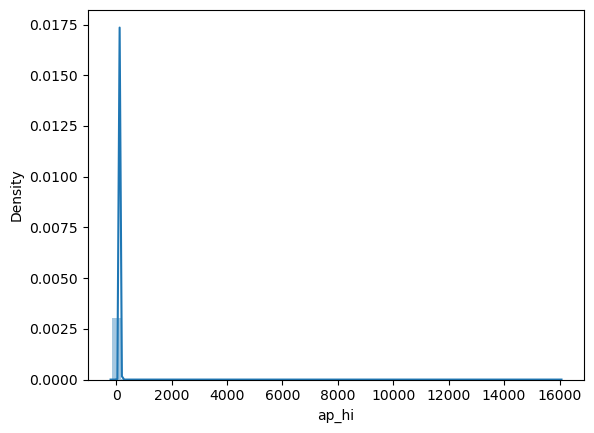

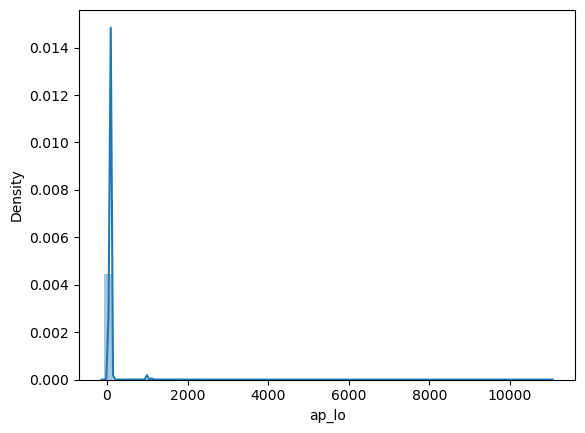

In [11]:
continuous_list = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for col in continuous_list:
    plt.figure()
    sns.distplot(df[col])

In [12]:
qualitative_list = [x for x in list(df.columns) if x not in continuous_list]
qualitative_list

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

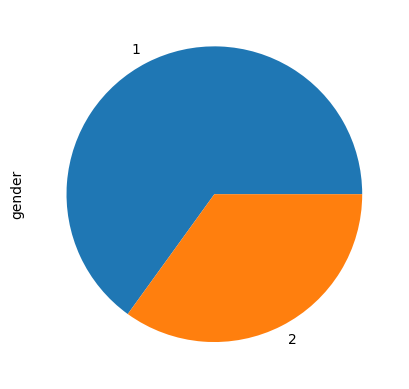

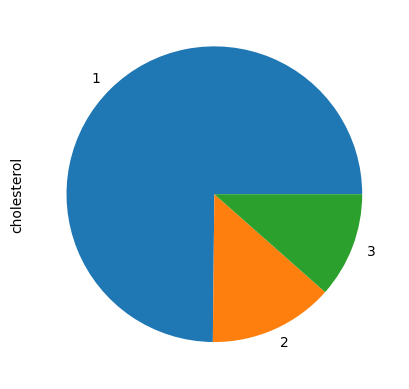

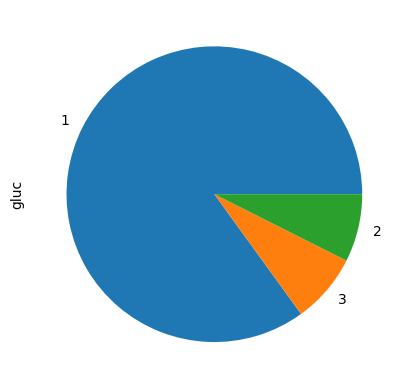

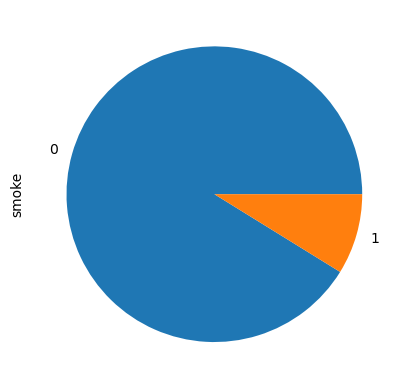

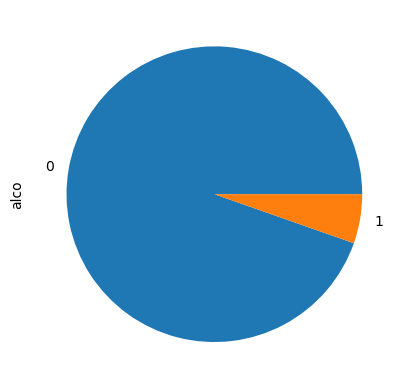

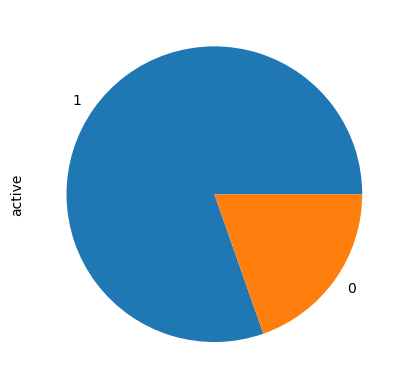

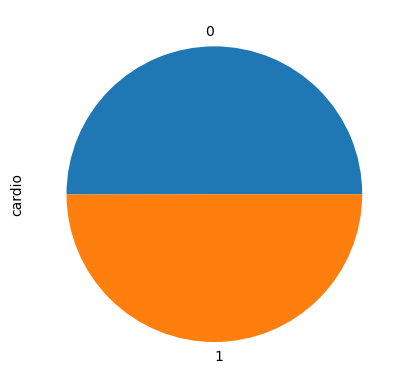

In [13]:
for col in qualitative_list:
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation Target / Variables
### Création de sous-ensembles positifs et négatifs

In [14]:
positive_df = df[df['cardio'] == 1]
negative_df = df[df['cardio'] == 0]

## Target / Continuous

C:\Users\khipa\AppData\Local\Temp\ipykernel_9096\3969103720.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='1')
C:\Users\khipa\AppData\Local\Temp\ipykernel_9096\3969103720.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], label='0')
C:\Users\khipa

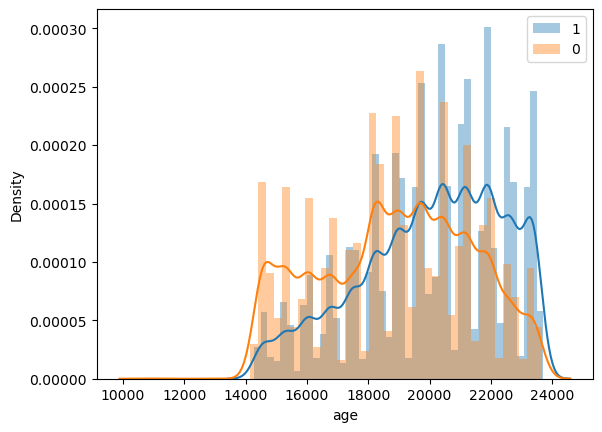

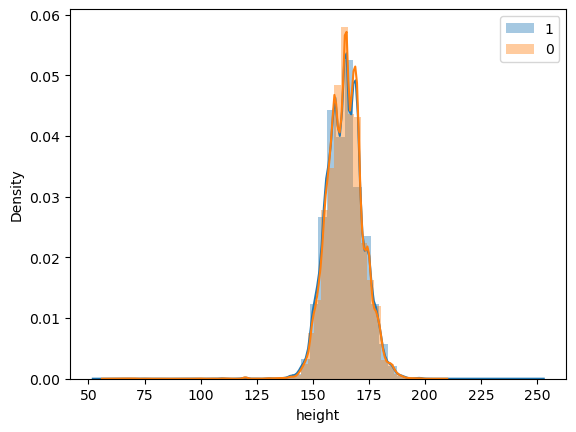

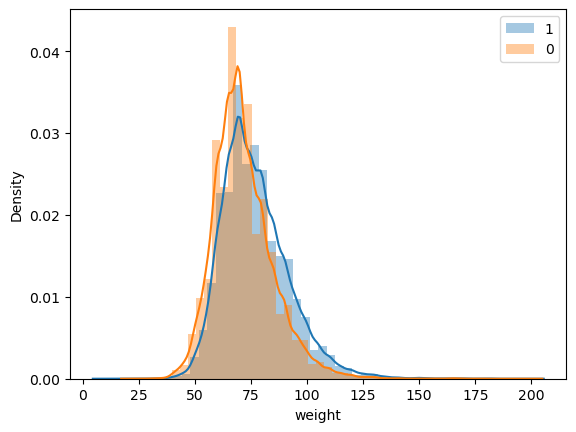

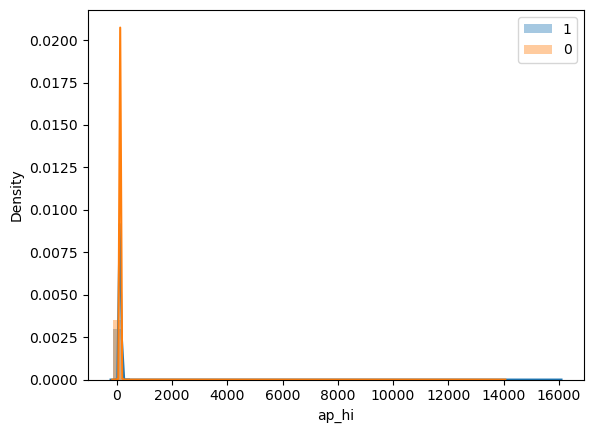

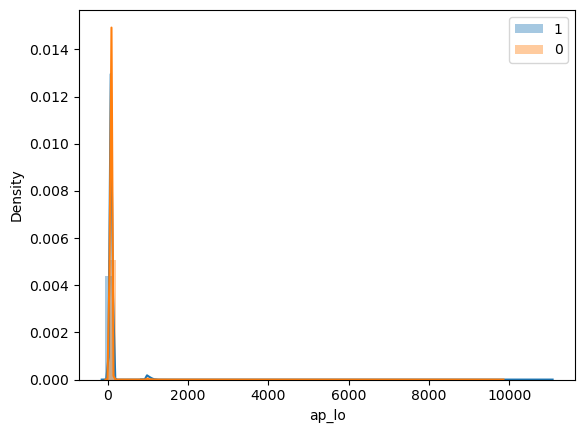

In [15]:
for col in continuous_list:
    plt.figure()
    sns.distplot(positive_df[col], label='1')
    sns.distplot(negative_df[col], label='0')
    plt.legend()

C:\Users\khipa\AppData\Local\Temp\ipykernel_9096\3996739761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col]<1000, label='1')
C:\Users\khipa\AppData\Local\Temp\ipykernel_9096\3996739761.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col]<1000, label='0')
C:\U

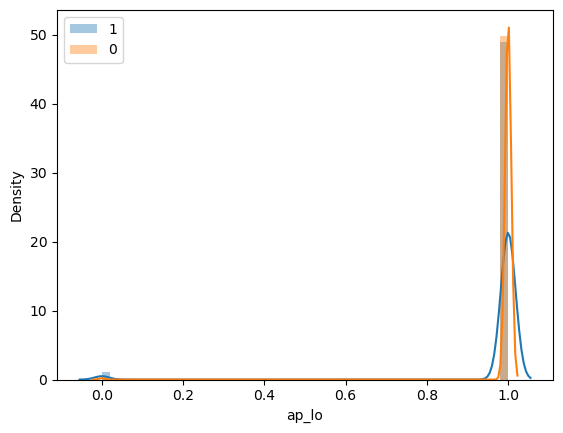

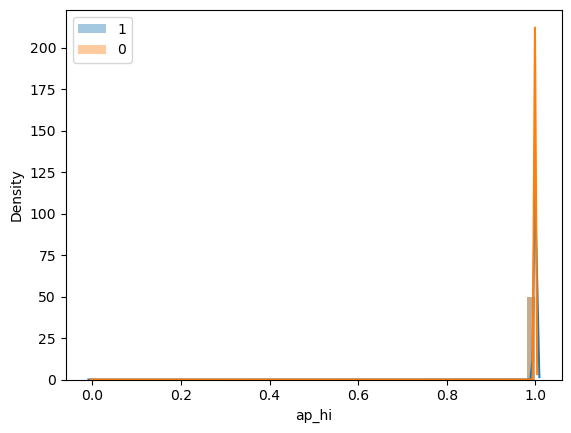

In [16]:
for col in ['ap_lo', 'ap_hi']:
    plt.figure()
    sns.distplot(positive_df[col]<1000, label='1')
    sns.distplot(negative_df[col]<1000, label='0')
    plt.legend()

## Target / Qualitative

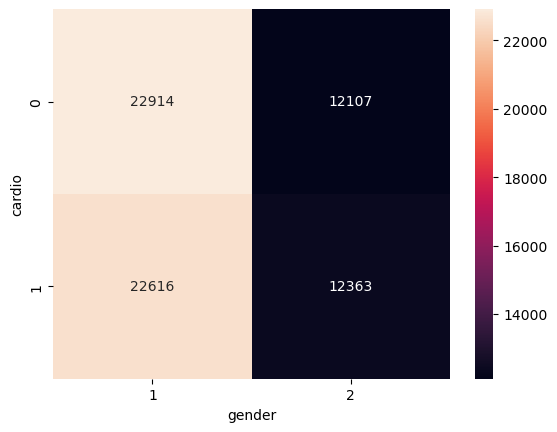

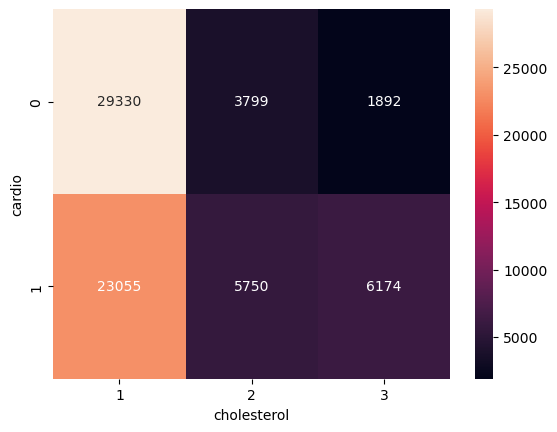

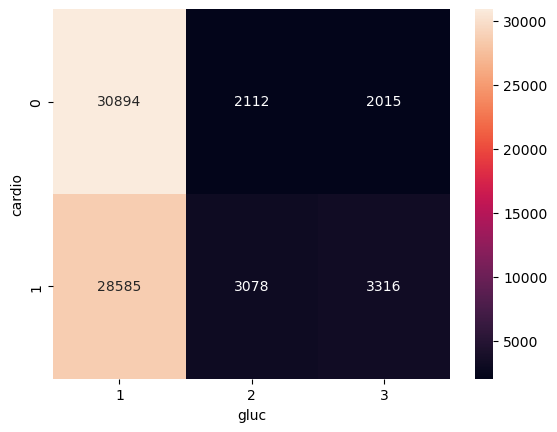

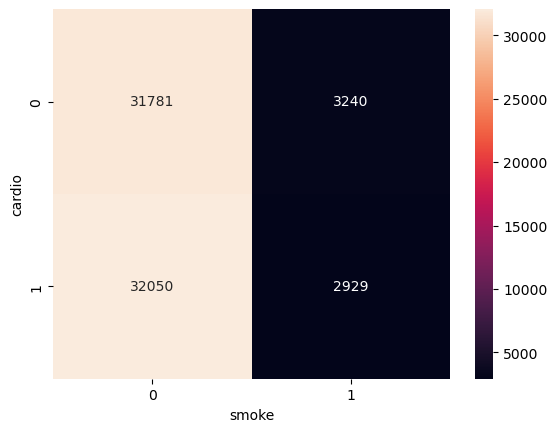

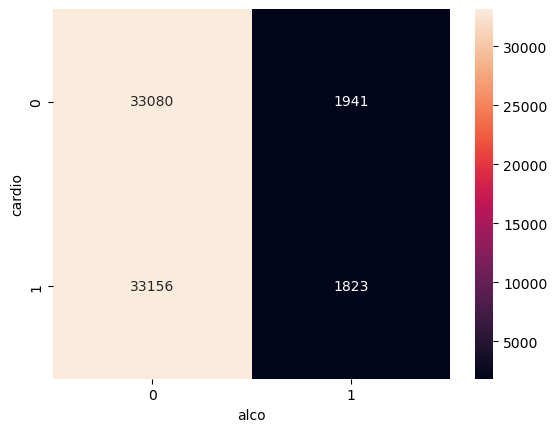

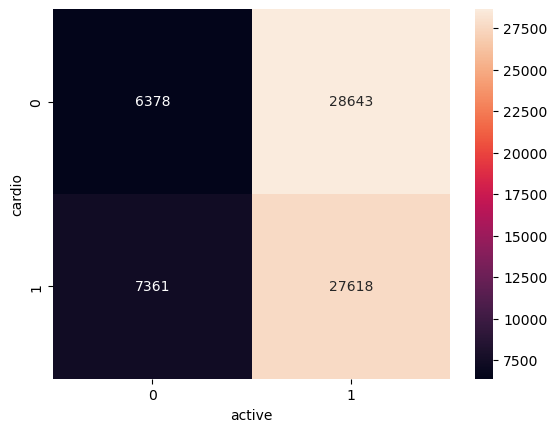

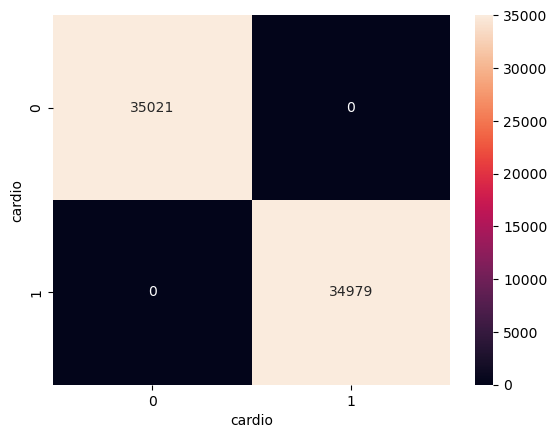

In [17]:
for col in qualitative_list:
    plt.figure()
    sns.heatmap(pd.crosstab(df['cardio'], df[col]), annot=True, fmt='d')

## Analyse un peu plus Avancée
### Relation Variables / Variables

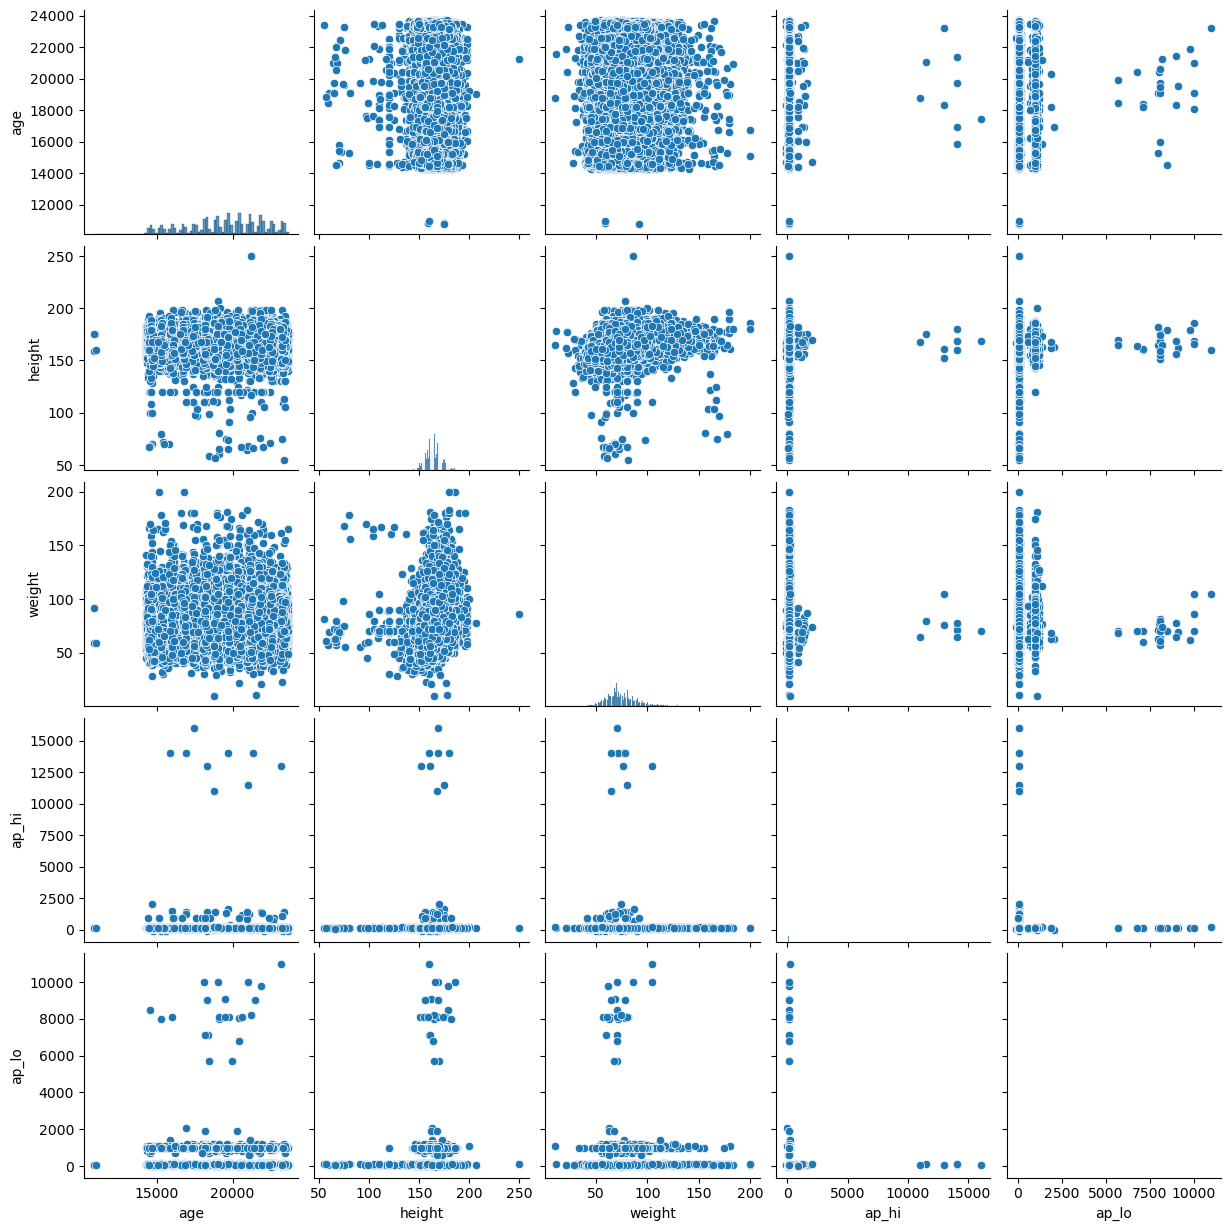

In [18]:
sns.pairplot(df[continuous_list])

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 500x500 with 0 Axes>

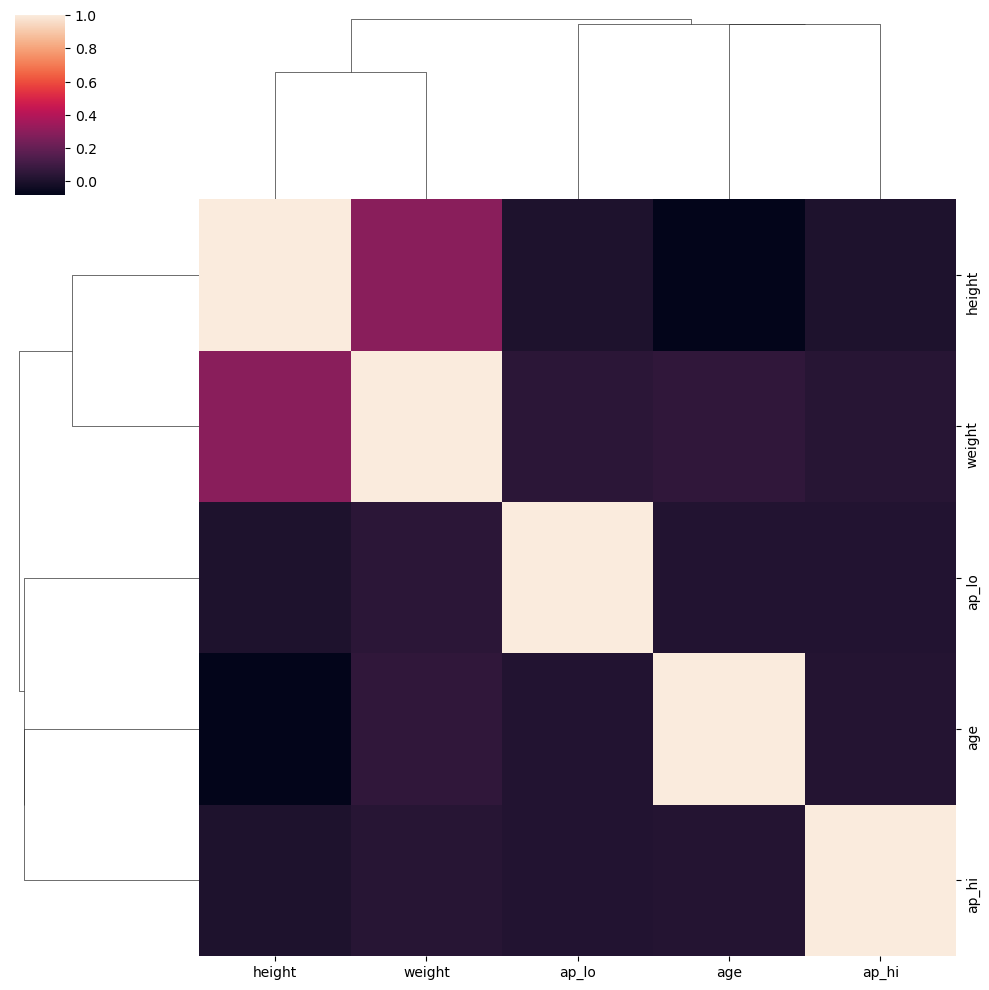

In [19]:
plt.figure(figsize= (5,5))
sns.clustermap(df[continuous_list].corr())
plt.show

## T-Test

In [24]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [21]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(negative_df[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [22]:
for col in continuous_list:
    print(f'{col :-<50} {t_test(col)}')

age----------------------------------------------- H0 Rejetée
height-------------------------------------------- H0 Rejetée
weight-------------------------------------------- H0 Rejetée
ap_hi--------------------------------------------- H0 Rejetée
ap_lo--------------------------------------------- H0 Rejetée


In [27]:
def chi2(col):
    alpha = 0.05
    stat, p , freedom, freq = chi2_contingency(pd.crosstab(df[col],df['cardio']))
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [28]:
for col in qualitative_list:
    print(f'{col :-<50} {chi2(col)}')

gender-------------------------------------------- H0 Rejetée
cholesterol--------------------------------------- H0 Rejetée
gluc---------------------------------------------- H0 Rejetée
smoke--------------------------------------------- H0 Rejetée
alco---------------------------------------------- 0
active-------------------------------------------- H0 Rejetée
cardio-------------------------------------------- H0 Rejetée
